# Taller 2

Perceptrón

1.   Importar paquetes necesarios


In [2]:
import numpy as np
import matplotlib.pyplot as plt

2.    Definir clase perceptrón



1. Inicializar el perceptrón

2. Propagación del perceptrón

  Cálculo de salida: $y = step(\sum_{i} w_i \cdot x_i )$

3. Aprendizaje o cálculo de pesos

  Para el caso de un perceptrón con una función de activación tipo step: $w_i = w_i + \alpha \cdot (y_d - y) \cdot x_i$


In [ ]:
class perceptron:
    def __init__(self, n):
        self.pesos = np.random.randn(n)
        self.n = n

    def propagacion(self, entradas):
        self.salida = 1 * (self.pesos.dot(entradas) > 0)
        self.entradas = entradas

    def actualización(self, alfa, salida):
        for i in range(0, self.n):
            self.pesos[i] = (
                self.pesos[i] + alfa*(salida - self.salida) * self.entradas[i])

3.    Creación del objeto, un perceptrón de tres entradas

In [ ]:
perceptron_tres_entradas = perceptron(3)

In [ ]:
perceptron_tres_entradas.pesos

array([-0.85176754,  1.29833736, -1.53047033])

4.    Entrenamiento hacia adelante

In [ ]:
perceptron_tres_entradas.propagacion([1,0,1])
perceptron_tres_entradas.salida

0

5. Actualización

In [ ]:
perceptron_tres_entradas.actualización(0.5,1)

In [ ]:
perceptron_tres_entradas.pesos

array([ 0.64823246,  1.29833736, -0.03047033])

# EJERCICIO 1

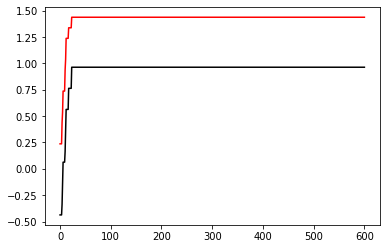

coordenada: [0 0] , Grupo C1 - Bien
coordenada: [0 2] , Grupo C1 - Bien
coordenada: [1 1] , Grupo C1 - Bien
coordenada: [1 2] , Grupo C2 - Bien
coordenada: [2 1] , Grupo C2 - Bien
coordenada: [2 2] , Grupo C2 - Bien
peso w1: 0.9634477739568903 - peso w2: 1.4372412849307383 - error: 0.47379351097384803


In [3]:
class perceptron_1:
    def __init__(self, n, pesos=""):
        self.pesos = np.random.randn(n) if isinstance(pesos,str) else pesos
        self.n = n

    def propagacion(self, entradas, umbral=0):
        self.salida = 1 * (self.pesos.dot(entradas) > umbral)
        self.entradas = entradas

    def actualización(self, alfa, salida):
        for i in range(self.n):
            self.pesos[i] = (
                self.pesos[i] + alfa*(salida - self.salida) * self.entradas[i])

ejemplos = np.array([[0,0,0],[0,2,0],[1,1,0],[1,2,1],[2,1,1],[2,2,1]])
pesos = np.array([-3,4,1])
umbral = pesos[0] * -1
"""
red_ejercicio_1 = perceptron_1(2, pesos[1::])
"""
red_ejercicio_1 = perceptron_1(2)

grad_pesos = [red_ejercicio_1.pesos]
for epoca in range(0,100):
    for i in range(0,len(ejemplos)):
        red_ejercicio_1.propagacion(ejemplos[i,0:2], umbral)
        red_ejercicio_1.actualización(0.1,ejemplos[i,2])
        grad_pesos = np.concatenate(
            (grad_pesos, [red_ejercicio_1.pesos]),axis=0)


plt.plot(grad_pesos[:,0],'k')
plt.plot(grad_pesos[:,1],'r')

plt.show()

for i in range(len(ejemplos)):
    red_ejercicio_1.propagacion(ejemplos[i,0:2], umbral)
    if red_ejercicio_1.salida == ejemplos[i,2]:
        print("coordenada: {} , Grupo {} - Bien".format(
            ejemplos[i,0:2], "C1" if red_ejercicio_1.salida == 0 else "C2"))
    else:
        print("coordenada: {} , Grupo {} - Mal".format(
            ejemplos[i,0:2], "C1" if red_ejercicio_1.salida == 0 else "C2"))


print("peso w1: {} - peso w2: {} - error: {}".format(
    red_ejercicio_1.pesos[0],red_ejercicio_1.pesos[1],
    abs(red_ejercicio_1.pesos[0]-red_ejercicio_1.pesos[1])))